## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [113]:
!nvidia-smi

Sun May 18 14:31:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             32W /   70W |     466MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
import json
HOME = os.getcwd()
print(HOME)

/content


In [114]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.138 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [118]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="rUbMldeZDFnHqBMaEUag")
project = rf.workspace("yolotest1-kvgfk").project("detection_v1")
version = project.version(4)
dataset = version.download("yolov8")




/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detection_V1-4 in yolov8:: 100%|██████████| 1400/1400 [00:00<00:00, 7725.36it/s]


## Custom Training

In [119]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.139 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.138 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Detection_V1-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, o

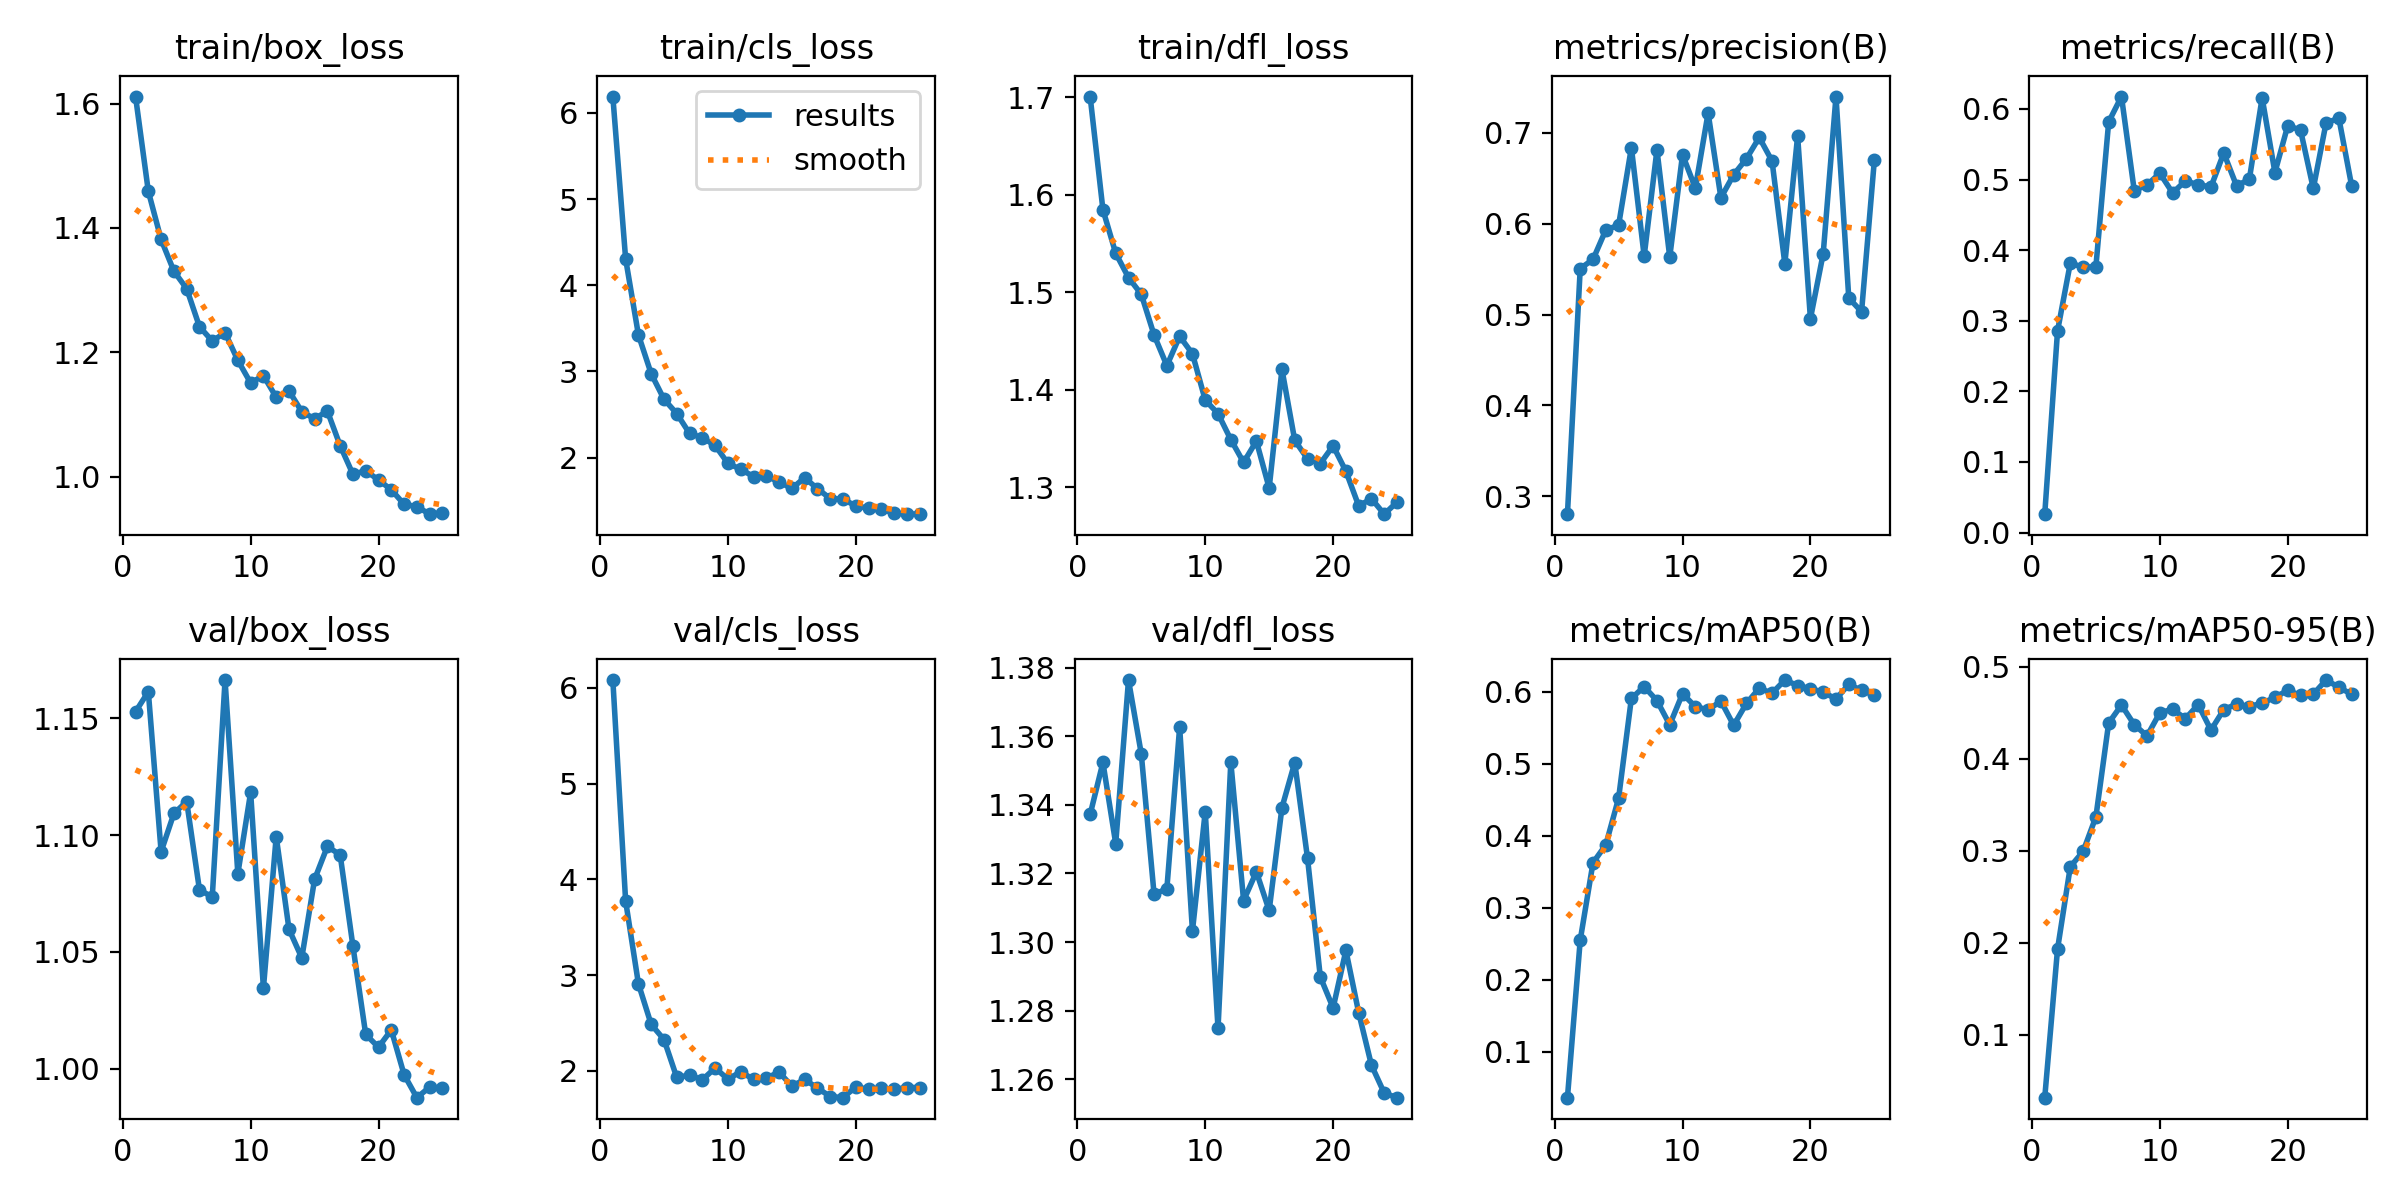

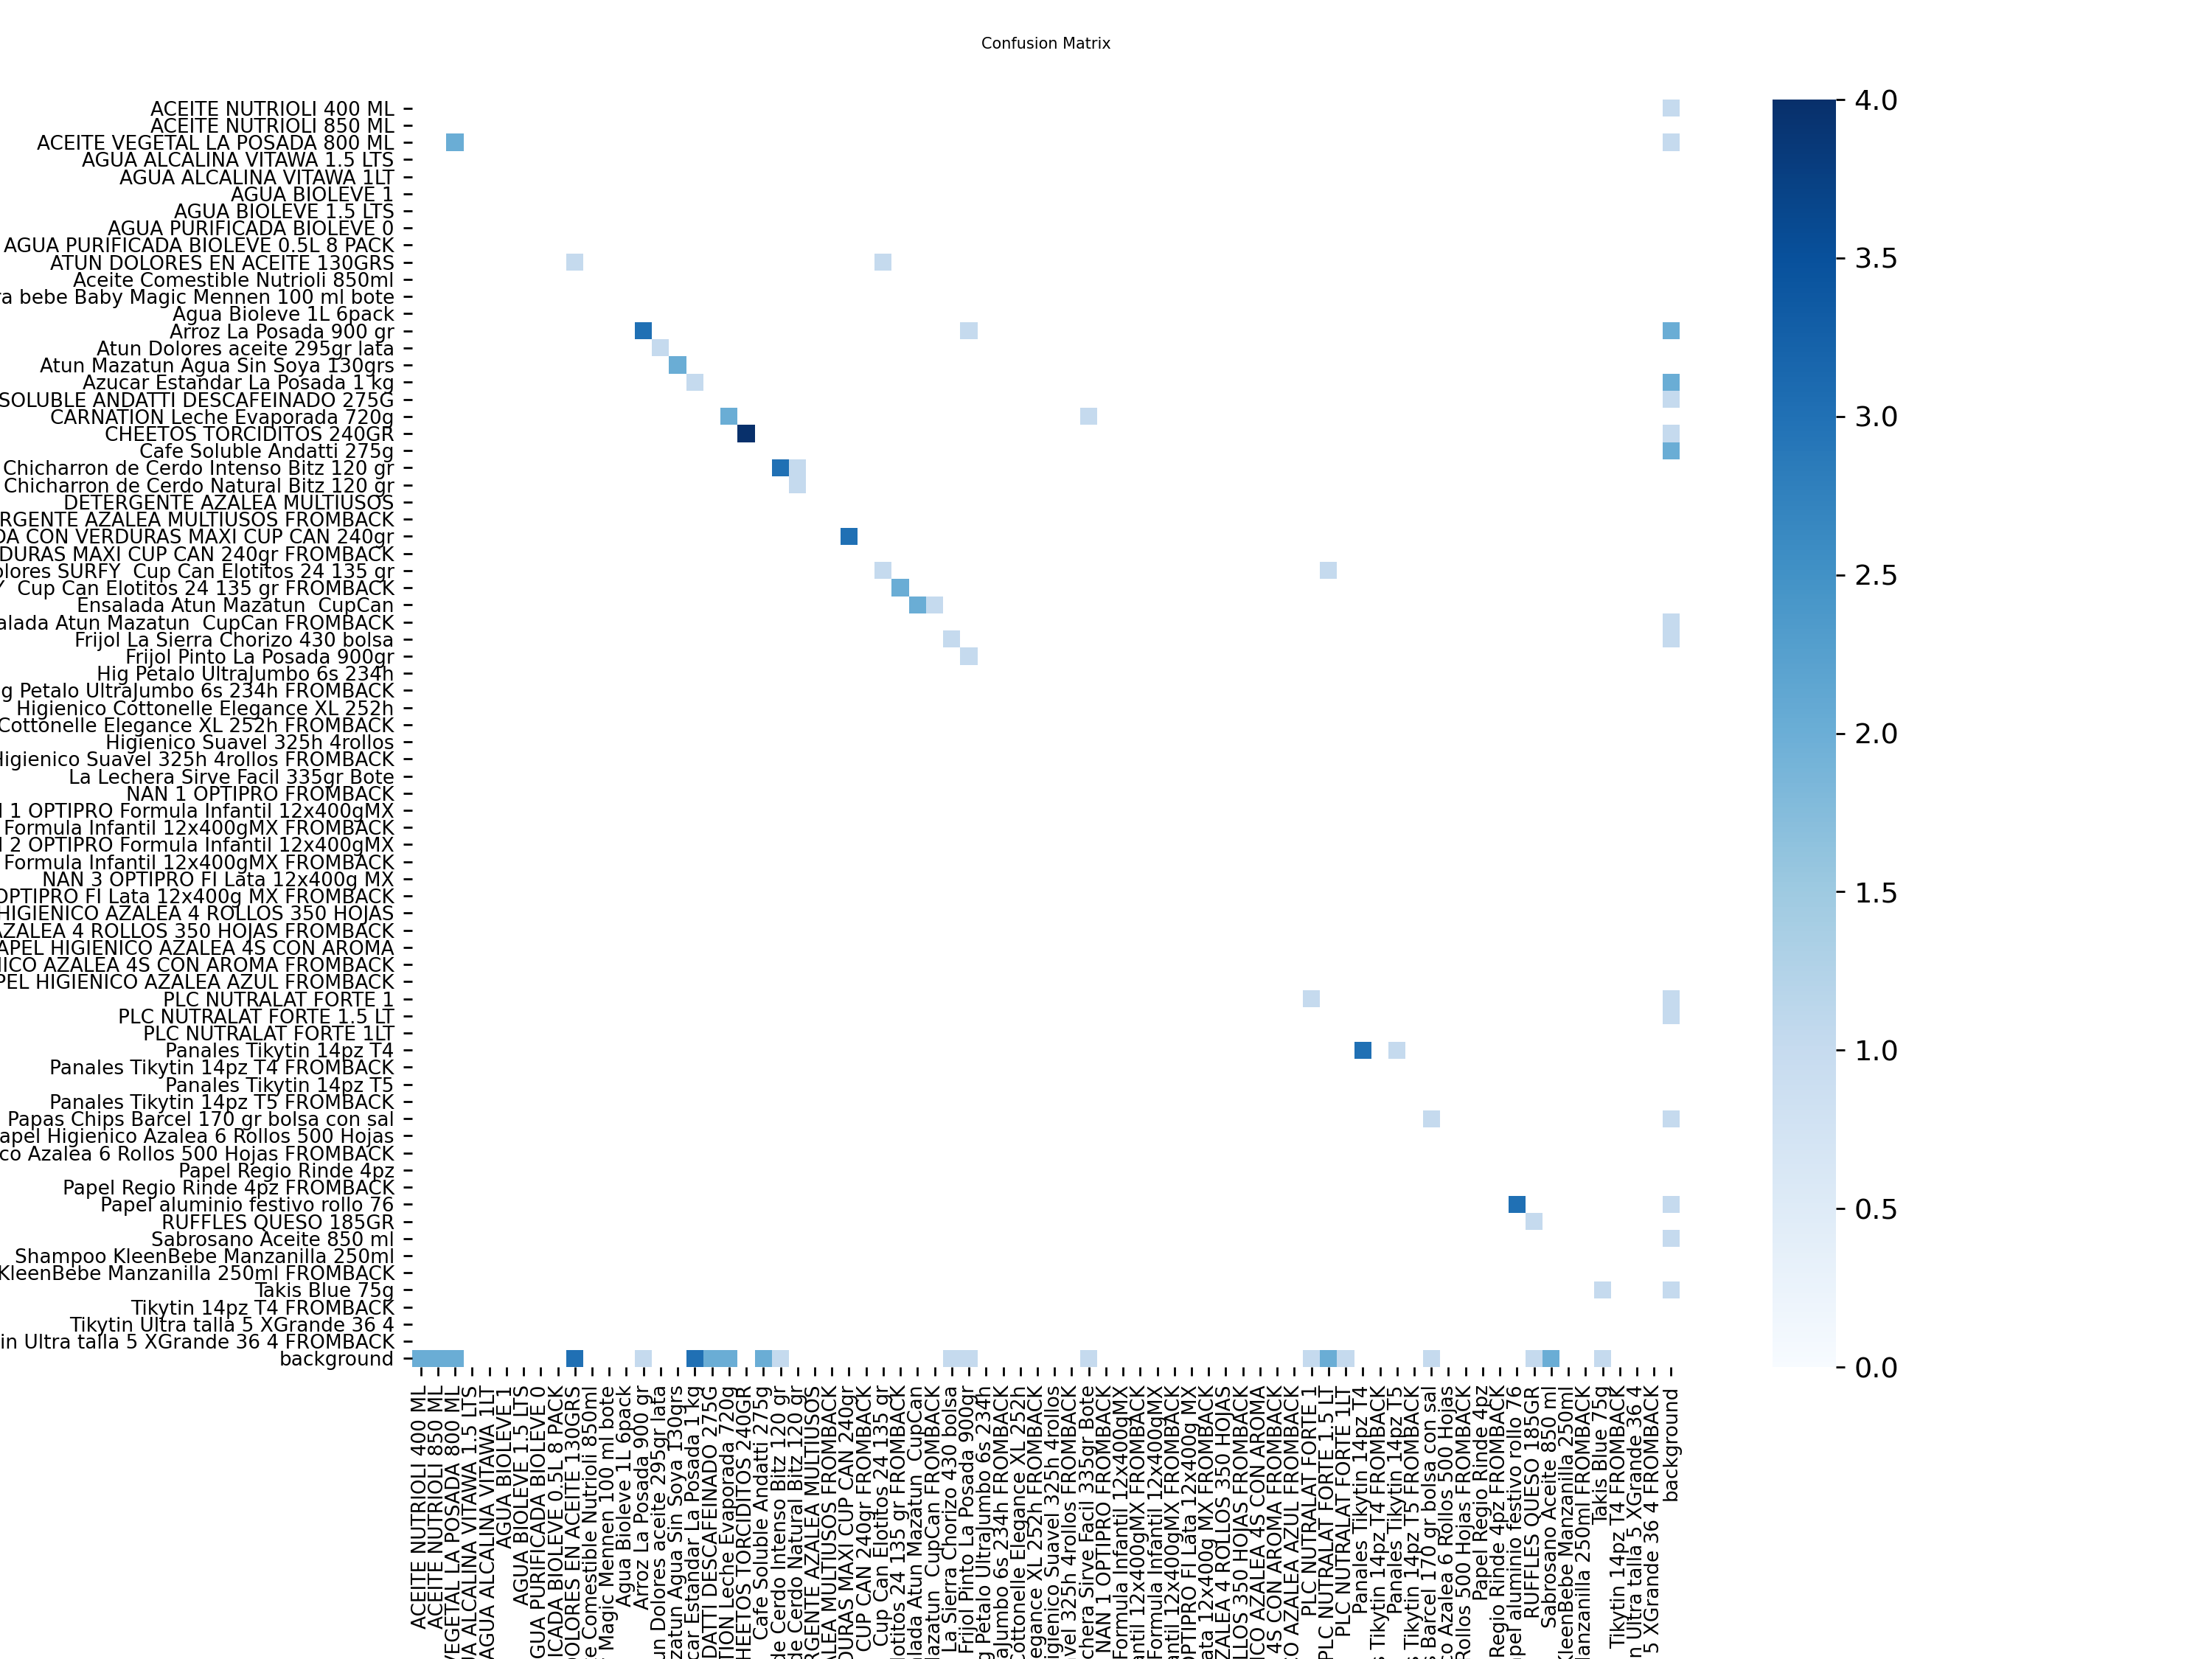

In [7]:
from IPython.display import Image, display
display(Image(filename='runs/detect/train/results.png'))  # curva de pérdidas y métricas
display(Image(filename='runs/detect/train/confusion_matrix.png'))  # matriz de confusión


/content


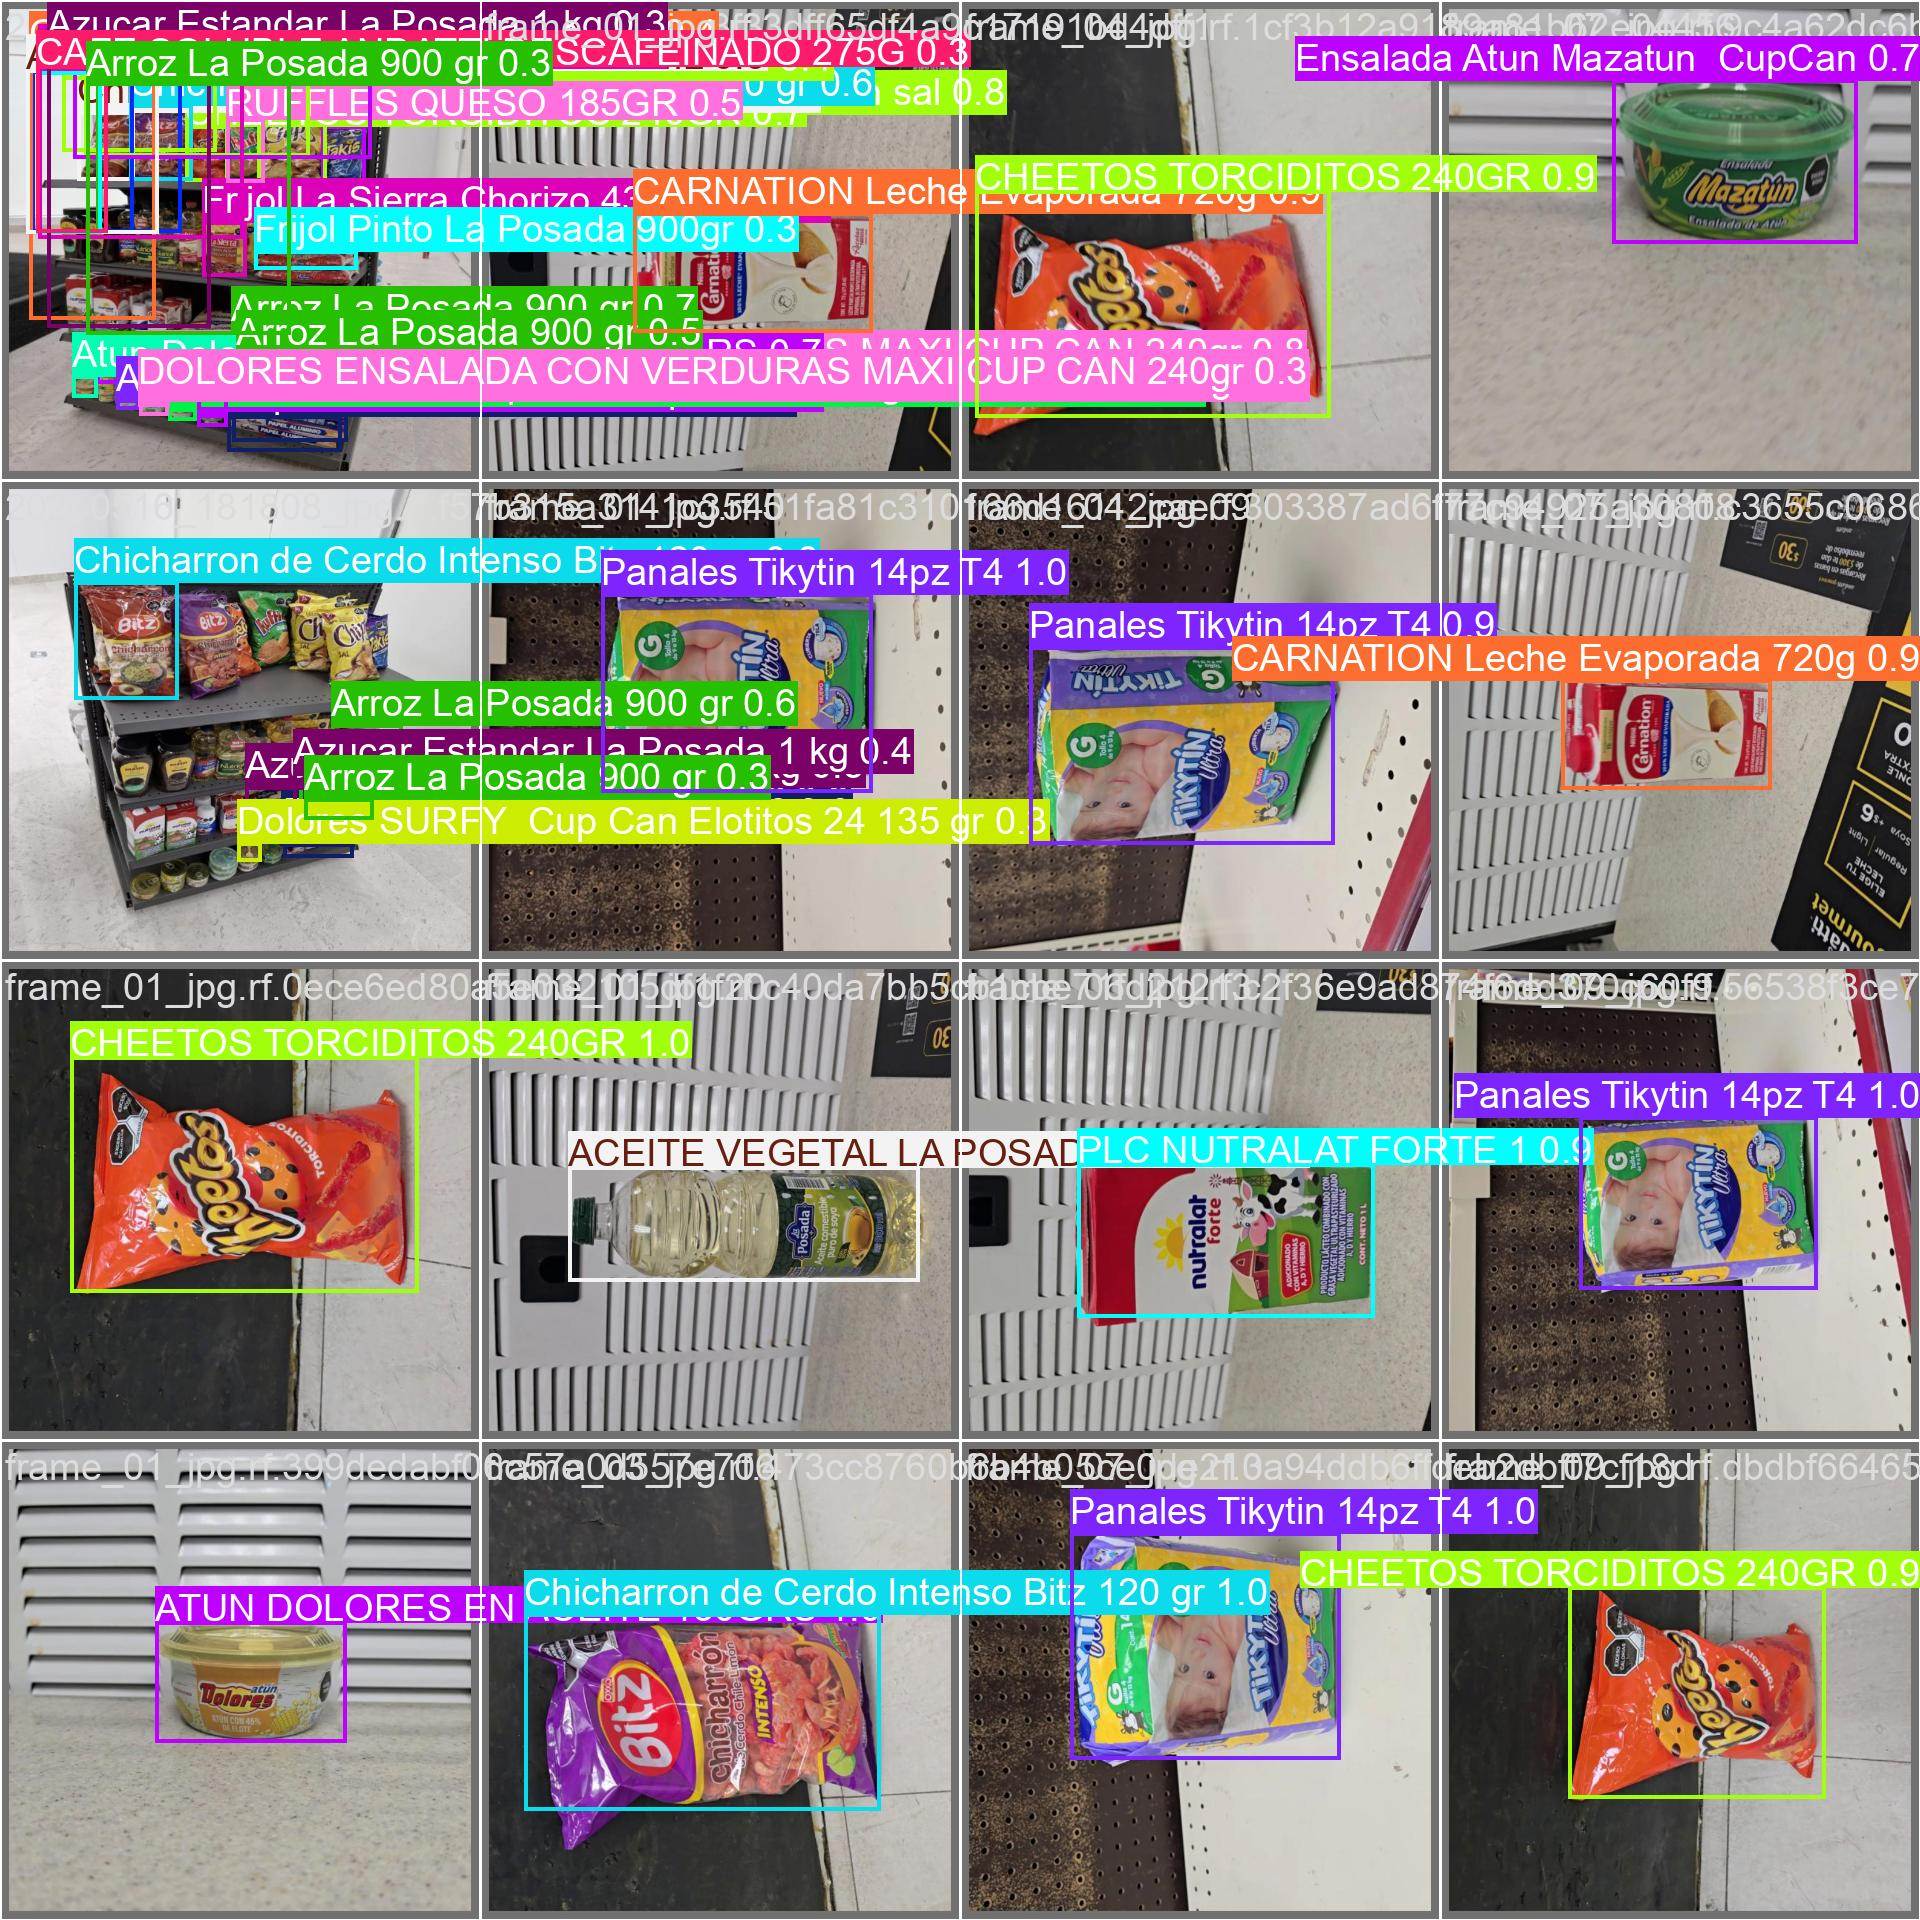

In [8]:
%cd {HOME}
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [9]:
import zipfile

zip_path = "/content/images.zip"  # Asegúrate de que el archivo esté en el directorio correcto
extract_to = "inference_images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [10]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
import os

image_folder = "inference_images"
results = model.predict(source="inference_images/Test", save=True, conf=0.25)  # `save=True` guarda las imágenes con predicciones




image 1/3 /content/inference_images/Test/20250516_215020.jpg: 800x608 1 ACEITE NUTRIOLI 850 ML, 1 ACEITE VEGETAL LA POSADA 800 ML, 3 ATUN DOLORES EN ACEITE 130GRSs, 2 Aceite Comestible Nutrioli 850mls, 2 Atun Mazatun Agua Sin Soya 130grss, 1 CAFE SOLUBLE ANDATTI DESCAFEINADO 275G, 1 CHEETOS TORCIDITOS 240GR, 1 Cafe Soluble Andatti 275g, 1 Chicharron de Cerdo Intenso Bitz 120 gr, 1 Chicharron de Cerdo Natural Bitz 120 gr, 2 DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240grs, 1 DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr FROMBACK, 2 Dolores SURFY  Cup Can Elotitos 24 135 grs, 1 Ensalada Atun Mazatun  CupCan, 1 Frijol La Sierra Chorizo 430 bolsa, 2 Frijol Pinto La Posada 900grs, 1 La Lechera Sirve Facil 335gr Bote, 4 Papel aluminio festivo rollo 76s, 2 RUFFLES QUESO 185GRs, 1 Sabrosano Aceite 850 ml, 43.9ms
image 2/3 /content/inference_images/Test/20250516_215054(1).jpg: 800x576 2 AGUA ALCALINA VITAWA 1.5 LTSs, 4 AGUA ALCALINA VITAWA 1LTs, 2 AGUA BIOLEVE 1s, 1 AGUA BIOLEVE 1.5 LTS, 1

In [53]:
from ultralytics import YOLO
import os
import json

# Cargar el modelo previamente entrenado
model = YOLO("runs/detect/train/weights/best.pt")

def predecir_imagen(ruta_imagen, conf=0.25, guardar=True, nombre_json="predictions.json"):
    resultados = model.predict(
        source=ruta_imagen,
        conf=conf,
        save=guardar
    )

    all_predictions = []

    for result in resultados:
        image_results = {
            "image": os.path.basename(result.path),
            "predictions": []
        }
        for box in result.boxes:
            bbox = box.xyxy[0].tolist()
            conf_score = box.conf[0].item()
            cls = int(box.cls[0].item())
            class_name = model.names[cls]  # Obtener el nombre de clase

            image_results["predictions"].append({
                "class_id": cls,
                "class_name": class_name,
                "confidence": round(conf_score, 3),
                "bbox": bbox
            })

        all_predictions.append(image_results)

    # Guardar en archivo JSON
    with open(nombre_json, "w") as f:
        json.dump(all_predictions, f, indent=4)

    return all_predictions

# Llamar a la función
results = predecir_imagen(ruta_imagen="inference_images/Test", conf=0.25, guardar=True)



image 1/3 /content/inference_images/Test/20250516_215020.jpg: 800x608 1 ACEITE NUTRIOLI 850 ML, 1 ACEITE VEGETAL LA POSADA 800 ML, 3 ATUN DOLORES EN ACEITE 130GRSs, 2 Aceite Comestible Nutrioli 850mls, 2 Atun Mazatun Agua Sin Soya 130grss, 1 CAFE SOLUBLE ANDATTI DESCAFEINADO 275G, 1 CHEETOS TORCIDITOS 240GR, 1 Cafe Soluble Andatti 275g, 1 Chicharron de Cerdo Intenso Bitz 120 gr, 1 Chicharron de Cerdo Natural Bitz 120 gr, 2 DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240grs, 1 DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr FROMBACK, 2 Dolores SURFY  Cup Can Elotitos 24 135 grs, 1 Ensalada Atun Mazatun  CupCan, 1 Frijol La Sierra Chorizo 430 bolsa, 2 Frijol Pinto La Posada 900grs, 1 La Lechera Sirve Facil 335gr Bote, 4 Papel aluminio festivo rollo 76s, 2 RUFFLES QUESO 185GRs, 1 Sabrosano Aceite 850 ml, 20.1ms
image 2/3 /content/inference_images/Test/20250516_215054(1).jpg: 800x576 2 AGUA ALCALINA VITAWA 1.5 LTSs, 4 AGUA ALCALINA VITAWA 1LTs, 2 AGUA BIOLEVE 1s, 1 AGUA BIOLEVE 1.5 LTS, 1

In [58]:
results

[{'image': '20250516_215020.jpg',
  'predictions': [{'class_id': 66,
    'class_name': 'Sabrosano Aceite 850 ml',
    'confidence': 0.926,
    'bbox': [1710.9296875,
     1444.3935546875,
     1984.3150634765625,
     2286.08251953125]},
   {'class_id': 25,
    'class_name': 'DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr',
    'confidence': 0.901,
    'bbox': [1310.498046875,
     3836.74560546875,
     1633.66943359375,
     4138.30029296875]},
   {'class_id': 15,
    'class_name': 'Atun Mazatun Agua Sin Soya 130grs',
    'confidence': 0.888,
    'bbox': [1034.371826171875,
     3924.79150390625,
     1311.3140869140625,
     4175.74072265625]},
   {'class_id': 31,
    'class_name': 'Frijol La Sierra Chorizo 430 bolsa',
    'confidence': 0.874,
    'bbox': [1983.51220703125,
     1715.9832763671875,
     2412.26708984375,
     2291.1962890625]},
   {'class_id': 17,
    'class_name': 'CAFE SOLUBLE ANDATTI DESCAFEINADO 275G',
    'confidence': 0.869,
    'bbox': [274.4648742675781,
 

In [56]:
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
import numpy as np
import json

# --- Cargar datos base ---
locations_df = pd.read_csv("locations.csv")

# Normalizar nombres
locations_df["nombre_normalizado"] = locations_df["Nombre"].str.strip().str.lower()
locations_df

CB                                            Nombre  Estante  \
0   7.500000e+17                    Atun Dolores aceite 295gr lata        1   
1   7.500000e+17                     ATUN DOLORES EN ACEITE 130GRS        1   
2   7.500000e+17                 Atun Mazatun Agua Sin Soya 130grs        1   
3   7.500000e+17  DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr        1   
4   7.500000e+17         Dolores SURFY  Cup Can Elotitos 24 135 gr        1   
5   7.500000e+17         Dolores SURFY  Cup Can Elotitos 24 135 gr        1   
6   7.500000e+17      Papel aluminio festivo rollo 76 m X 30 cm pz        1   
7   7.500000e+17                         PLC NUTRALAT FORTE 1.5 LT        1   
8   7.500000e+17                            PLC NUTRALAT FORTE 1LT        1   
9   7.500000e+17                 La Lechera Sirve Facil 335gr Bote        1   
10  7.500000e+17                    CARNATION Leche Evaporada 720g        1   
11  7.500000e+17                    Azucar Estandar La Posada 1 kg        1   
12  7.500000e+17                            Arroz La Posada 900 gr        1   
13  7.500000e+17            CAFE SOLUBLE ANDATTI DESCAFEINADO 275G        1   
14  7.500000e+17                         Cafe Soluble Andatti 275g        1   
15  7.500000e+17                   ACEITE VEGETAL LA POSADA 800 ML        1   
16  7.500000e+17                  Aceite Comestible Nutrioli 850ml        1   
17  7.500000e+17                            ACEITE NUTRIOLI 400 ML        1   
18  7.500000e+17                           Sabrosano Aceite 850 ml        1   
19  7.500000e+17                Frijol La Sierra Chorizo 430 bolsa        1   
20  7.500000e+17                      Frijol Pinto La Posada 900gr        1   
21  7.500000e+17           Chicharron de Cerdo Natural Bitz 120 gr        1   
22  7.500000e+17          Chicharron de Cerdo Intenso Bitz 120 gr.        1   
23  7.500000e+17                          CHEETOS TORCIDITOS 240GR        1   
24  7.500000e+17                               RUFFLES QUESO 185GR        1   
25  7.500000e+15           Papas Chips Barcel 170 gr bolsa con sal        1   
26  7.500000e+17                                    Takis Blue 75g        1   
27  7.500000e+17                             Papel Regio Rinde 4pz        2   
28  7.510000e+17                     Higienico Suavel 325h 4rollos        2   
29  7.510000e+17             Higienico Cottonelle Elegance XL 252h        2   
30  7.510000e+17                     Hig Petalo UltraJumbo 6s 234h        2   
31  7.500000e+17                  DETERGENTE AZALEA MULTIUSOS 800G        2   
32  7.500000e+17         PAPEL HIGIENICO AZALEA 4 ROLLOS 350 HOJAS        2   
33  7.500000e+17               PAPEL HIGIENICO AZALEA 4S CON AROMA        2   
34  7.500000e+17         Papel Higienico Azalea 6 Rollos 500 Hojas        2   
35  7.500000e+17    Aceite para bebe Baby Magic Mennen 100 ml bote        2   
36  7.510000e+17                Shampoo KleenBebe Manzanilla 250ml        2   
37  7.500000e+17                           Panales Tikytin 14pz T4        2   
38  7.500000e+17                           Panales Tikytin 14pz T5        2   
39  7.500000e+17               Tikytin Ultra talla 5 X-Grande 36/4        2   
40  7.500000e+17          NAN 1 OPTIPRO Formula Infantil 12x400gMX        2   
41  7.500000e+17          NAN 2 OPTIPRO Formula Infantil 12x400gMX        2   
42  7.500000e+17                  NAN 3 OPTIPRO FI Lata 12x400g MX        2   
43  7.500000e+17                              AGUA BIOLEVE 1.5 LTS        2   
44  7.500000e+17                      AGUA ALCALINA VITAWA 1.5 LTS        2   
45  7.500000e+17                          AGUA ALCALINA VITAWA 1LT        2   
46  7.500000e+17                             Agua Bioleve 1L 6pack        2   
47  7.500000e+17               AGUA PURIFICADA BIOLEVE 0.5L 8 PACK        2   

    Charola  Posicion en Charola  Cantidad de Frentes    Altura     Ancho  \
0         1                    1                    1   5.00 cm  

In [74]:
detecciones = results[1]["predictions"]
detecciones

[{'class_id': 4,
  'class_name': 'AGUA ALCALINA VITAWA 1LT',
  'confidence': 0.859,
  'bbox': [462.9463195800781,
   367.2509765625,
   659.9666137695312,
   964.0616455078125]},
 {'class_id': 67,
  'class_name': 'Shampoo KleenBebe Manzanilla 250ml',
  'confidence': 0.792,
  'bbox': [274.4403381347656,
   1275.84912109375,
   442.0994873046875,
   1675.440673828125]},
 {'class_id': 49,
  'class_name': 'PAPEL HIGIENICO AZALEA 4S CON AROMA',
  'confidence': 0.757,
  'bbox': [1045.889892578125,
   1958.228271484375,
   1526.77001953125,
   2410.37548828125]},
 {'class_id': 23,
  'class_name': 'DETERGENTE AZALEA MULTIUSOS',
  'confidence': 0.733,
  'bbox': [196.01480102539062,
   1929.55224609375,
   626.2120971679688,
   2226.38037109375]},
 {'class_id': 5,
  'class_name': 'AGUA BIOLEVE 1',
  'confidence': 0.719,
  'bbox': [197.8163299560547,
   142.4145965576172,
   427.0326843261719,
   953.788818359375]},
 {'class_id': 33,
  'class_name': 'Hig Petalo UltraJumbo 6s 234h',
  'confidence'

In [88]:
# Suponiendo que 'detecciones' es igual a results[1]["predictions"]
detecciones_convertidas = [
    {
        "nombre": d["class_name"],
        "conf": round(d["confidence"], 2),  # Redondeamos la confianza a 2 decimales
        "bbox": [round(coord, 2) for coord in d["bbox"]]  # Redondeamos coordenadas también
    }
    for d in detecciones
]


In [89]:
detecciones_convertidas

[{'nombre': 'AGUA ALCALINA VITAWA 1LT',
  'conf': 0.86,
  'bbox': [462.95, 367.25, 659.97, 964.06]},
 {'nombre': 'Shampoo KleenBebe Manzanilla 250ml',
  'conf': 0.79,
  'bbox': [274.44, 1275.85, 442.1, 1675.44]},
 {'nombre': 'PAPEL HIGIENICO AZALEA 4S CON AROMA',
  'conf': 0.76,
  'bbox': [1045.89, 1958.23, 1526.77, 2410.38]},
 {'nombre': 'DETERGENTE AZALEA MULTIUSOS',
  'conf': 0.73,
  'bbox': [196.01, 1929.55, 626.21, 2226.38]},
 {'nombre': 'AGUA BIOLEVE 1',
  'conf': 0.72,
  'bbox': [197.82, 142.41, 427.03, 953.79]},
 {'nombre': 'Hig Petalo UltraJumbo 6s 234h',
  'conf': 0.71,
  'bbox': [1633.88, 2661.59, 2274.21, 3142.24]},
 {'nombre': 'DETERGENTE AZALEA MULTIUSOS',
  'conf': 0.71,
  'bbox': [135.45, 2239.85, 579.29, 2327.97]},
 {'nombre': 'AGUA ALCALINA VITAWA 1LT',
  'conf': 0.67,
  'bbox': [883.24, 357.88, 1077.4, 964.48]},
 {'nombre': 'Higienico Suavel 325h 4rollos',
  'conf': 0.67,
  'bbox': [732.26, 2651.63, 1170.38, 3128.6]},
 {'nombre': 'AGUA ALCALINA VITAWA 1LT',
  'conf':

In [109]:
# Simulación de detecciones reales
detecciones = [
    {"nombre": "AGUA ALCALINA VITAWA 1LT", "conf": 0.92, "bbox": [458.85, 371.14, 666.40, 963.93]},
    {"nombre": "DETERGENTE AZALEA MULTIUSOS 800G", "conf": 0.89, "bbox": [103.23, 2351.51, 531.72, 2436.09]},
    {"nombre": "AGUA ALCALINA VITAWA 1LT", "conf": 0.81, "bbox": [1072.36, 361.32, 1259.42, 959.10]},
    {"nombre": "AGUA ALCALINA VITAWA 1LT", "conf": 0.75, "bbox": [669.96, 292.14, 898.35, 966.63]},
    {"nombre": "Panales Tikytin 14pz T5", "conf": 0.70, "bbox": [924.08, 1123.69, 1265.02, 1665.42]},
    {"nombre": "AGUA ALCALINA VITAWA 1LT", "conf": 0.65, "bbox": [881.27, 364.79, 1075.76, 960.12]},
    {"nombre": "DETERGENTE AZALEA MULTIUSOS 800G", "conf": 0.65, "bbox": [162.28, 2225.16, 582.93, 2324.78]},
    {"nombre": "Shampoo KleenBebe Manzanilla 250ml", "conf": 0.65, "bbox": [296.09, 1279.95, 423.64, 1696.79]},
    {"nombre": "NAN 1 OPTIPRO Formula Infantil 12x400gMX", "conf": 0.63, "bbox": [1999.35, 1342.34, 2245.11, 1667.92]},
    {"nombre": "Panales Tikytin 14pz T5", "conf": 0.59, "bbox": [1266.10, 1133.66, 1584.44, 1668.34]},
    {"nombre": "Panales Tikytin 14pz T5", "conf": 0.58, "bbox": [539.62, 1213.93, 851.47, 1673.29]},
    {"nombre": "PAPEL HIGIENICO AZALEA 4 ROLLOS 350 HOJAS", "conf": 0.53, "bbox": [590.21, 1967.93, 1045.48, 2418.35]},
    {"nombre": "NAN 1 OPTIPRO Formula Infantil 12x400gMX", "conf": 0.50, "bbox": [1763.24, 1342.70, 1991.45, 1666.97]},
    {"nombre": "DETERGENTE AZALEA MULTIUSOS 800G", "conf": 0.50, "bbox": [206.09, 1941.73, 605.59, 2232.78]},
    {"nombre": "Panales Tikytin 14pz T4", "conf": 0.48, "bbox": [539.63, 1208.89, 854.02, 1680.44]},
    {"nombre": "AGUA ALCALINA VITAWA 1LT", "conf": 0.38, "bbox": [668.75, 290.24, 898.09, 968.07]},
    {"nombre": "DETERGENTE AZALEA MULTIUSOS 800G", "conf": 0.36, "bbox": [123.56, 2288.58, 551.74, 2358.94]},
    {"nombre": "NAN 1 OPTIPRO Formula Infantil 12x400gMX", "conf": 0.34, "bbox": [1535.09, 1343.76, 1755.97, 1668.22]},
    {"nombre": "NAN 2 OPTIPRO Formula Infantil 12x400gMX", "conf": 0.27, "bbox": [2000.02, 1342.35, 2244.60, 1666.46]},
    {"nombre": "Papel Regio Rinde 4pz", "conf": 0.26, "bbox": [239.92, 2690.97, 721.91, 3151.93]}
]


In [99]:
detecciones=detecciones_convertidas

In [110]:


# Estante principal
nombres_detectados = [d["nombre"].lower().strip() for d in detecciones]
estantes_detectados = []

for nombre in nombres_detectados:
    match = locations_df[locations_df["nombre_normalizado"] == nombre]
    if not match.empty:
        estantes_detectados.append(match["Estante"].values[0])

estante_principal = Counter(estantes_detectados).most_common(1)[0][0]
df_estante = locations_df[locations_df["Estante"] == estante_principal].copy()

# Detecciones fuera del estante
nombres_estante_principal = set(df_estante["nombre_normalizado"])
nombres_fuera_de_estante = [
    d["nombre"] for d in detecciones
    if d["nombre"].lower().strip() not in nombres_estante_principal
]

# Faltantes
no_detectados = df_estante[
    ~df_estante["nombre_normalizado"].isin(nombres_detectados)
]["Nombre"].tolist()

# --- KMeans para clustering por charola ---
factor_y = 100
centroides = []
nombres = []
bboxes = []

for d in detecciones:
    x1, y1, x2, y2 = d["bbox"]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    centroides.append([cx, cy * factor_y])
    nombres.append(d["nombre"])
    bboxes.append(d["bbox"])

centroides = np.array(centroides)
kmeans = KMeans(n_clusters=4, random_state=42).fit(centroides)
labels = kmeans.labels_

centroides_orig = np.array([[x, y / factor_y] for x, y in centroides])
orden_clusters = sorted(
    {i: np.mean(centroides_orig[labels == i][:, 1]) for i in range(4)}.items(),
    key=lambda x: x[1]
)
etiquetas_charola = {cluster_id: f"{4 - i}" for i, (cluster_id, _) in enumerate(orden_clusters)}

df_resultados = pd.DataFrame({
    "nombre": nombres,
    "bbox": bboxes,
    "charola_cluster": [etiquetas_charola[c] for c in labels]
})
df_resultados["nombre_normalizado"] = df_resultados["nombre"].str.lower().str.strip()
df_estante["nombre_normalizado"] = df_estante["Nombre"].str.lower().str.strip()

df_final = pd.merge(
    df_resultados,
    df_estante[["CB", "nombre_normalizado", "Charola", "Posicion en Charola"]],
    on="nombre_normalizado",
    how="left"
)




In [111]:
df_final

nombre  \
0                    AGUA ALCALINA VITAWA 1LT   
1            DETERGENTE AZALEA MULTIUSOS 800G   
2                    AGUA ALCALINA VITAWA 1LT   
3                    AGUA ALCALINA VITAWA 1LT   
4                     Panales Tikytin 14pz T5   
5                    AGUA ALCALINA VITAWA 1LT   
6            DETERGENTE AZALEA MULTIUSOS 800G   
7          Shampoo KleenBebe Manzanilla 250ml   
8    NAN 1 OPTIPRO Formula Infantil 12x400gMX   
9                     Panales Tikytin 14pz T5   
10                    Panales Tikytin 14pz T5   
11  PAPEL HIGIENICO AZALEA 4 ROLLOS 350 HOJAS   
12   NAN 1 OPTIPRO Formula Infantil 12x400gMX   
13           DETERGENTE AZALEA MULTIUSOS 800G   
14                    Panales Tikytin 14pz T4   
15                   AGUA ALCALINA VITAWA 1LT   
16           DETERGENTE AZALEA MULTIUSOS 800G   
17   NAN 1 OPTIPRO Formula Infantil 12x400gMX   
18   NAN 2 OPTIPRO Formula Infantil 12x400gMX   
19                      Papel Regio Rinde 4pz   

                                    bbox charola_cluster  \
0        [458.85, 371.14, 666.4, 963.93]               4   
1     [103.23, 2351.51, 531.72, 2436.09]               2   
2      [1072.36, 361.32, 1259.42, 959.1]               4   
3       [669.96, 292.14, 898.35, 966.63]               4   
4    [924.08, 1123.69, 1265.02, 1665.42]               3   
5      [881.27, 364.79, 1075.76, 960.12]               4   
6     [162.28, 2225.16, 582.93, 2324.78]               2   
7     [296.09, 1279.95, 423.64, 1696.79]               3   
8   [1999.35, 1342.34, 2245.11, 1667.92]               3   
9    [1266.1, 1133.66, 1584.44, 1668.34]               3   
10    [539.62, 1213.93, 851.47, 1673.29]               3   
11   [590.21, 1967.93, 1045.48, 2418.35]               2   
12   [1763.24, 1342.7, 1991.45, 1666.97]               3   
13    [206.09, 1941.73, 605.59, 2232.78]               2   
14    [539.63, 1208.89, 854.02, 1680.44]               3   
15      [668.75, 290.24, 898.09, 968.07]               4   
16    [123.56, 2288.58, 551.74, 2358.94]               2   
17  [1535.09, 1343.76, 1755.97, 1668.22]               3   
18   [2000.02, 1342.35, 2244.6, 1666.46]               3   
19    [239.92, 2690.97, 721.91, 3151.93]               1   

                           nombre_normalizado            CB  Charola  \
0                    agua alcalina vitawa 1lt  7.500000e+17        4   
1            detergente azalea multiusos 800g  7.500000e+17        2   
2                    agua alcalina vitawa 1lt  7.500000e+17        4   
3                    agua alcalina vitawa 1lt  7.500000e+17        4   
4                     panales tikytin 14pz t5  7.500000e+17        3   
5                    agua alcalina vitawa 1lt  7.500000e+17        4   
6            detergente azalea multiusos 800g  7.500000e+17        2   
7          shampoo kleenbebe manzanilla 250ml  7.510000e+17        3   
8    nan 1 optipro formula infantil 12x400gmx  7.500000e+17        3   
9                     panales tikytin 14pz t5  7.500000e+17        3   
10                    panales tikytin 14pz t5  7.500000e+17        3   
11  papel higienico azalea 4 rollos 350 hojas  7.500000e+17        2   
12   nan 1 optipro formula infantil 12x400gmx  7.500000e+17        3   
13           detergente azalea multiusos 800g  7.500000e+17        2   
14                    panales tikytin 14pz t4  7.500000e+17        3   
15                   agua alcalina vitawa 1lt  7.500000e+17        4   
16           detergente azalea multiusos 800g  7.500000e+17        2   
17   nan 1 optipro formula infantil 12x400gmx  7.500000e+17        3   
18   nan 2 optipro formula infantil 12x400gmx  7.500000e+17        3   
19                      papel regio rinde 4pz  7.500000e+17        1   

    Posicion en Charola  
0                     3  
1                     1  
2                     3  
3                     3  
4                     4  
5                     3  
6                     1  
7                     2  
8

In [112]:
df_final.drop(columns=["nombre_normalizado"], inplace=True)
df_final["charola_cluster"] = df_final["charola_cluster"].fillna(-1).astype(int)
df_final["Charola"] = df_final["Charola"].fillna(-1).astype(int)


# --- Clasificaciones ---
productos_mal_estante = [
    {
        "id": locations_df[locations_df["nombre_normalizado"] == d["nombre"].lower().strip()]["CB"].values[0]
        if not locations_df[locations_df["nombre_normalizado"] == d["nombre"].lower().strip()].empty else None,
        "nombre": d["nombre"],
        "bbox": d["bbox"],
        "clase": "Mal Estante"
    }
    for d in detecciones
    if d["nombre"] in nombres_fuera_de_estante
]

productos_faltantes = [
    {
        "id": locations_df[locations_df["Nombre"] == nombre]["CB"].values[0]
        if not locations_df[locations_df["Nombre"] == nombre].empty else None,
        "nombre": nombre,
        "bbox": [],
        "clase": "Producto faltante"
    }
    for nombre in no_detectados
]

productos_mal_charola = []
for _, row in df_final.iterrows():
    if row["charola_cluster"] != row["Charola"]:
        productos_mal_charola.append({
            "id": row["CB"],
            "nombre": row["nombre"],
            "bbox": row["bbox"],
            "clase": "Mal charola"
        })

df_final_filtrado = df_final[df_final["charola_cluster"] == df_final["Charola"]].copy()

productos_mal_posicion = []
for charola in df_final_filtrado["Charola"].unique():
    grupo = df_final_filtrado[df_final_filtrado["Charola"] == charola].copy()
    grupo["centro_x"] = grupo["bbox"].apply(lambda b: (b[0] + b[2]) / 2)
    grupo_ordenado = grupo.sort_values(by="centro_x").reset_index(drop=True)

    bloques = []
    bloque_actual = {
        "nombre": grupo_ordenado.loc[0, "nombre"],
        "centro_xs": [grupo_ordenado.loc[0, "centro_x"]],
        "planograma": grupo_ordenado.loc[0, "Posicion en Charola"],
        "bbox": grupo_ordenado.loc[0, "bbox"],
        "id": grupo_ordenado.loc[0, "CB"]
    }

    for i in range(1, len(grupo_ordenado)):
        fila = grupo_ordenado.loc[i]
        if fila["nombre"] == bloque_actual["nombre"]:
            bloque_actual["centro_xs"].append(fila["centro_x"])
        else:
            bloques.append(bloque_actual)
            bloque_actual = {
                "nombre": fila["nombre"],
                "centro_xs": [fila["centro_x"]],
                "planograma": fila["Posicion en Charola"],
                "bbox": fila["bbox"],
                "id": fila["CB"]
            }
    bloques.append(bloque_actual)

    for b in bloques:
        b["centro_x"] = sum(b["centro_xs"]) / len(b["centro_xs"])
    bloques = sorted(bloques, key=lambda x: x["centro_x"])

    for i, bloque in enumerate(bloques):
        if bloque["planograma"] != (i + 1):
            productos_mal_posicion.append({
                "id": bloque["id"],
                "nombre": bloque["nombre"],
                "bbox": bloque["bbox"],
                "clase": "Mal posición"
            })

# --- Productos bien acomodados ---
errores_set = {(d["nombre"], tuple(d["bbox"])) for d in productos_mal_charola + productos_mal_posicion + productos_mal_estante}

productos_bien_acomodados = [
    {
        "id": locations_df[locations_df["nombre_normalizado"] == d["nombre"].lower().strip()]["CB"].values[0]
        if not locations_df[locations_df["nombre_normalizado"] == d["nombre"].lower().strip()].empty else None,
        "nombre": d["nombre"],
        "bbox": d["bbox"],
        "clase": "Bien acomodado"
    }
    for d in detecciones
    if (d["nombre"], tuple(d["bbox"])) not in errores_set
    and d["nombre"] not in no_detectados
    and d["nombre"] not in nombres_fuera_de_estante
]

# --- Combinar y exportar ---
resultado_final = (
    productos_mal_estante +
    productos_faltantes +
    productos_mal_charola +
    productos_mal_posicion +
    productos_bien_acomodados
)
resultado_final


[{'id': 7.51e+17,
  'nombre': 'Higienico Suavel 325h 4rollos',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.51e+17,
  'nombre': 'Higienico Cottonelle Elegance XL 252h',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.51e+17,
  'nombre': 'Hig Petalo UltraJumbo 6s 234h',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'PAPEL HIGIENICO AZALEA 4S CON AROMA',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'Papel Higienico Azalea 6 Rollos 500 Hojas',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'Aceite para bebe Baby Magic Mennen 100 ml bote',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'Tikytin Ultra talla 5 X-Grande 36/4',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'NAN 3 OPTIPRO FI Lata 12x400g MX',
  'bbox': [],
  'clase': 'Producto faltante'},
 {'id': 7.5e+17,
  'nombre': 'AGUA BIOLEVE 1.5 LTS',
  'bbox': [],
  'cla

In [15]:
import csv
import pandas as pd

df_teorico = pd.read_csv('/content/NUEVO_DEF1.csv', encoding='latin-1')
df_teorico.head()

CB                                          Nombre  Charola  \
0  7,50E+17                          ACEITE NUTRIOLI 850 ML      3.0   
1  7,50E+17                          ACEITE NUTRIOLI 400 ML      3.0   
2  7,50E+17  Aceite para bebe Baby Magic Mennen 100 ml bote      7.0   
3  7,50E+17                 ACEITE VEGETAL LA POSADA 800 ML      3.0   
4  7,50E+17                    AGUA ALCALINA VITAWA 1.5 LTS      8.0   

  Posicion en Charola  Cantidad de Frentes    Altura    Ancho Profundo  \
0                   4                  1.0  26.00 cm  8.00 cm  2.00 cm   
1                   5                  1.0  21.30 cm  6.80 cm  2.00 cm   
2                   1                  1.0  12.50 cm  5.20 cm  3.30 cm   
3                   3                  1.0  23.80 cm  7.58 cm  2.00 cm   
4                   2                  2.0  30.00 cm  9.00 cm  9.00 cm   

                       Unnamed: 8  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4  Estan dos, al lado de la otra.

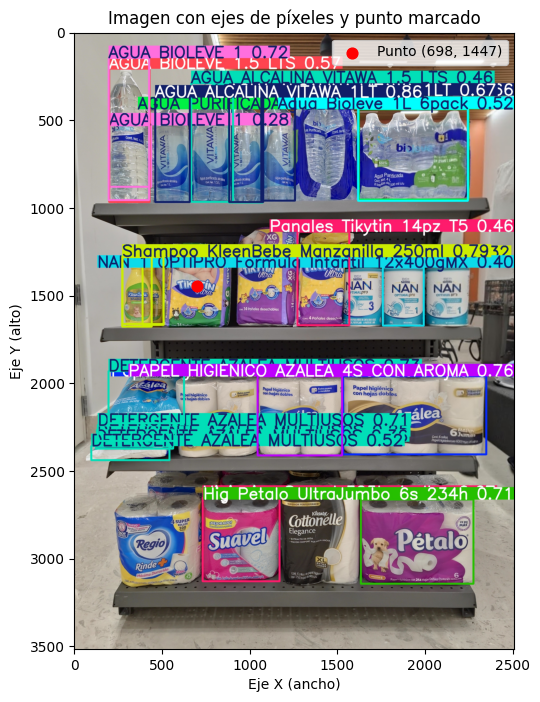

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
img = mpimg.imread('runs/detect/predict/20250516_215054(1).jpg')

# Coordenadas del punto
x = 698
y = 1447

# Mostrar la imagen con el punto
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.scatter(x, y, color='red', s=60, label=f'Punto ({x}, {y})')  # punto rojo
plt.title("Imagen con ejes de píxeles y punto marcado")
plt.xlabel("Eje X (ancho)")
plt.ylabel("Eje Y (alto)")
plt.legend()
plt.grid(False)

In [16]:


# Convertir unidades si es necesario
df_teorico['Altura'] = df_teorico['Altura'].str.replace(' cm', '').astype(float)
df_teorico['Ancho'] = df_teorico['Ancho'].str.replace(' cm', '').astype(float)
df_teorico['Profundo'] = df_teorico['Profundo'].str.replace(' cm', '').astype(float)


In [17]:
df_teorico.head()

CB                                          Nombre  Charola  \
0  7,50E+17                          ACEITE NUTRIOLI 850 ML      3.0   
1  7,50E+17                          ACEITE NUTRIOLI 400 ML      3.0   
2  7,50E+17  Aceite para bebe Baby Magic Mennen 100 ml bote      7.0   
3  7,50E+17                 ACEITE VEGETAL LA POSADA 800 ML      3.0   
4  7,50E+17                    AGUA ALCALINA VITAWA 1.5 LTS      8.0   

  Posicion en Charola  Cantidad de Frentes  Altura  Ancho  Profundo  \
0                   4                  1.0    26.0   8.00       2.0   
1                   5                  1.0    21.3   6.80       2.0   
2                   1                  1.0    12.5   5.20       3.3   
3                   3                  1.0    23.8   7.58       2.0   
4                   2                  2.0    30.0   9.00       9.0   

                       Unnamed: 8  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4  Estan dos, al lado de la otra.

In [18]:
detecciones = []
for result in results:
    print(f"\n📷 Imagen: {result.path}")
    for box in result.boxes:
        xyxy = box.xyxy[0].tolist()  # Coordenadas (x1, y1, x2, y2)
        conf = box.conf[0].item()    # Confianza
        cls = box.cls[0].item()      # ID de
        class_name = model.names[cls]

        print(f"Clase: {int(cls)}, Nombre:{class_name}, Confianza: {conf:.2f}, BBox: {xyxy}")

for result in results:
    nombre_img = os.path.basename(result.path)
    for box in result.boxes:
        xyxy = box.xyxy[0].tolist()
        conf = box.conf[0].item()
        cls = box.cls[0].item()
        nombre_clase = model.names[cls]

        detecciones.append({
            'imagen': nombre_img,
            'clase': nombre_clase,
            'confianza': conf,
            'x1': xyxy[0],
            'y1': xyxy[1],
            'x2': xyxy[2],
            'y2': xyxy[3],
            'ancho_bbox': xyxy[2] - xyxy[0],
            'alto_bbox': xyxy[3] - xyxy[1]
        })

df_detectado = pd.DataFrame(detecciones)
df_detectado.head(20)


📷 Imagen: /content/inference_images/Test/20250516_215020.jpg
Clase: 66, Nombre:Sabrosano Aceite 850 ml, Confianza: 0.93, BBox: [1710.9296875, 1444.3935546875, 1984.3150634765625, 2286.08251953125]
Clase: 25, Nombre:DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr, Confianza: 0.90, BBox: [1310.498046875, 3836.74560546875, 1633.66943359375, 4138.30029296875]
Clase: 15, Nombre:Atun Mazatun Agua Sin Soya 130grs, Confianza: 0.89, BBox: [1034.371826171875, 3924.79150390625, 1311.3140869140625, 4175.74072265625]
Clase: 31, Nombre:Frijol La Sierra Chorizo 430 bolsa, Confianza: 0.87, BBox: [1983.51220703125, 1715.9832763671875, 2412.26708984375, 2291.1962890625]
Clase: 17, Nombre:CAFE SOLUBLE ANDATTI DESCAFEINADO 275G, Confianza: 0.87, BBox: [274.4648742675781, 1605.6536865234375, 629.5272827148438, 2270.45263671875]
Clase: 15, Nombre:Atun Mazatun Agua Sin Soya 130grs, Confianza: 0.84, BBox: [1032.8953857421875, 4113.40380859375, 1298.4659423828125, 4277.81787109375]
Clase: 65, Nombre:RUFFLES 

imagen                                              clase  \
0   20250516_215020.jpg                            Sabrosano Aceite 850 ml   
1   20250516_215020.jpg   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
2   20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
3   20250516_215020.jpg                 Frijol La Sierra Chorizo 430 bolsa   
4   20250516_215020.jpg             CAFE SOLUBLE ANDATTI DESCAFEINADO 275G   
5   20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
6   20250516_215020.jpg                                RUFFLES QUESO 185GR   
7   20250516_215020.jpg                          Cafe Soluble Andatti 275g   
8   20250516_215020.jpg                           CHEETOS TORCIDITOS 240GR   
9   20250516_215020.jpg                    Papel aluminio festivo rollo 76   
10  20250516_215020.jpg                    ACEITE VEGETAL LA POSADA 800 ML   
11  20250516_215020.jpg                   Aceite Comestible Nutrioli 850ml   
12  20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
13  20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
14  20250516_215020.jpg            Chicharron de Cerdo Intenso Bitz 120 gr   
15  20250516_215020.jpg  DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240...   
16  20250516_215020.jpg            Chicharron de Cerdo Natural Bitz 120 gr   
17  20250516_215020.jpg                             ACEITE NUTRIOLI 850 ML   
18  20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
19  20250516_215020.jpg                      Ensalada Atun Mazatun  CupCan   

    confianza           x1           y1           x2           y2  \
0    0.925855  1710.929688  1444.393555  1984.315063  2286.082520   
1    0.900872  1310.498047  3836.745605  1633.669434  4138.300293   
2    0.887834  1034.371826  3924.791504  1311.314087  4175.740723   
3    0.874001  1983.512207  1715.983276  2412.267090  2291.196289   
4    0.868839   274.464874  1605.653687   629.527283  2270.452637   
5    0.840899  1032.895386  4113.403809  1298.465942  4277.817871   
6    0.796504  1717.176270   514.749634  2246.733887  1166.996216   
7    0.791577   640.697510  1598.801025   982.735962  2274.443848   
8    0.745220  1249.881592   508.987640  1718.011108  1171.021240   
9    0.656076  2192.913818  4054.257568  3224.783691  4296.359375   
10   0.655346   993.323486  1489.171631  1259.921265  2267.506836   
11   0.652249  1300.516479  1481.288940  1572.294800  2258.882324   
12   0.643560  1628.620605  3907.201416  1902.324585  4173.627930   
13   0.636607  1626.335327  4110.114258  1899.969116  4303.676270   
14   0.625598   703.210815   278.728760  1269.091797  1175.298340   
15   0.572160   435.087494  3926.060547   755.598633  4234.718750   
16   0.521243   111.750755   128.737122   683.216492  1169.227783   
17   0.511227  1299.008057  1480.311157  1573.604004  2257.963135   
18   0.456703   749.372314  3823.660400  1024.899414  4069.329590   
19   0.431778  1905.833984  4096.758789  2180.465820  4294.785645   

     ancho_bbox    alto_bbox  
0    273.385376   841.688965  
1    323.171387   301.554688  
2    276.942261   250.949219  
3    428.754883   575.213013  
4    355.062408   664.798950  
5    265.570557   164.414062  
6    529.557617   652.246582  
7    342.038452   675.642822  
8    468.129517   662.033600  
9   1031.869873   242.101807  
10   266.597778   778.335205  
11   271.778320   777.593384  
12   273.703979   266.426514  
13   273.633789   193.562012  
14   565.880981   896.569580  
15   320.511139   308.658203  
16   571.465736  1040.490662  
17   274.595947   777.651978  
18   275.527100   245.669189  
19   274.631836   198.026855

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
img = mpimg.imread('runs/detect/predict/20250516_215020.jpg')

# Coordenadas del punto
x = 668
y = 1165

img.shape

(4766, 3462, 3)

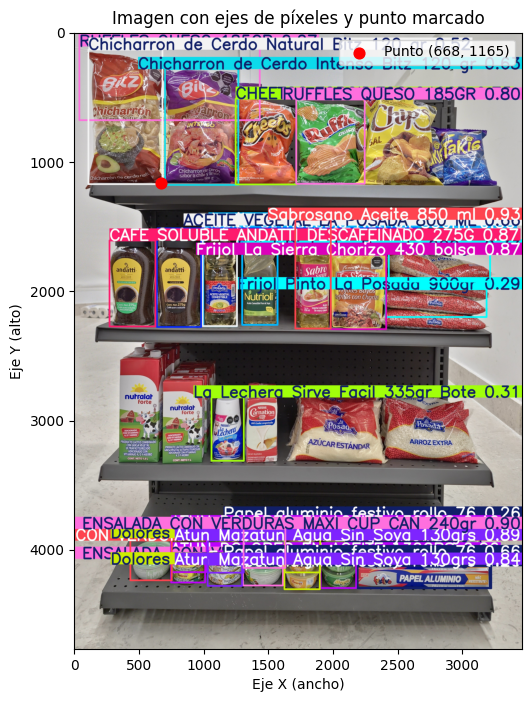

In [20]:
# Mostrar la imagen con el punto
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.scatter(x, y, color='red', s=60, label=f'Punto ({x}, {y})')  # punto rojo
plt.title("Imagen con ejes de píxeles y punto marcado")
plt.xlabel("Eje X (ancho)")
plt.ylabel("Eje Y (alto)")
plt.legend()
plt.grid(False)

In [28]:
# Función para asociar productos detectados con teóricos
def encontrar_match(producto_detectado, df_teorico, umbral_nombre=0.6):
    import difflib

    nombre_detectado = producto_detectado['clase']
    posibles = df_teorico['Nombre'].tolist()

    # Obtener el nombre más similar
    coincidencias = difflib.get_close_matches(nombre_detectado, posibles, n=1, cutoff=umbral_nombre)

    if coincidencias:
        return coincidencias[0]
    else:
        return None

# Aplicar comparación
df_detectado['match_teorico'] = df_detectado.apply(lambda x: encontrar_match(x, df_teorico), axis=1)



In [29]:
df_detectado

imagen                                             clase  \
0   20250516_215020.jpg                           Sabrosano Aceite 850 ml   
1   20250516_215020.jpg  DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
2   20250516_215020.jpg                 Atun Mazatun Agua Sin Soya 130grs   
3   20250516_215020.jpg                Frijol La Sierra Chorizo 430 bolsa   
4   20250516_215020.jpg            CAFE SOLUBLE ANDATTI DESCAFEINADO 275G   
..                  ...                                               ...   
62         IMG_0077.jpg                     Higienico Suavel 325h 4rollos   
63         IMG_0077.jpg               PAPEL HIGIENICO AZALEA 4S CON AROMA   
64         IMG_0077.jpg         Papel Higienico Azalea 6 Rollos 500 Hojas   
65         IMG_0077.jpg         Papel Higienico Azalea 6 Rollos 500 Hojas   
66         IMG_0077.jpg                       DETERGENTE AZALEA MULTIUSOS   

    confianza           x1           y1           x2           y2  ancho_bbox  \
0    0.925855  1710.929688  1444.393555  1984.315063  2286.082520  273.385376   
1    0.900872  1310.498047  3836.745605  1633.669434  4138.300293  323.171387   
2    0.887834  1034.371826  3924.791504  1311.314087  4175.740723  276.942261   
3    0.874001  1983.512207  1715.983276  2412.267090  2291.196289  428.754883   
4    0.868839   274.464874  1605.653687   629.527283  2270.452637  355.062408   
..        ...          ...          ...          ...          ...         ...   
62   0.480909   857.368713  2759.438721  1301.561523  3200.461914  444.192810   
63   0.469056  1267.946777  2078.916748  1758.076538  2547.090332  490.129761   
64   0.454847   773.325439  2112.190186  1273.574341  2605.824219  500.248901   
65   0.378587  1762.891113  2259.594727  2562.196533  2530.029541  799.305420   
66   0.328529   157.778015  2060.473633   758.969666  2433.801270  601.191650   

     alto_bbox  charola_cluster  charola  posicion_en_charola  \
0   841.688965                0        2                    7   
1   301.554688                1        4                    8   
2   250.949219                1        4                    6   
3   575.213013                0        2                    8   
4   664.798950                0        2                    1   
..         ...              ...      ...                  ...   
62  441.023193                3        3                    1   
63  468.173584                0        2                    5   
64  493.634033                0        2                    4   
65  270.434814                0        2                    6   
66  373.327637                0        2                    3   

                                       match_teorico  
0                            Sabrosano Aceite 850 ml  
1   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr  
2                  Atun Mazatun Agua Sin Soya 130grs  
3                 Frijol La Sierra Chorizo 430 bolsa  
4             CAFE SOLUBLE ANDATTI DESCAFEINADO 275G  
..                                               ...  
62                     Higienico Suavel 325h 4rollos  
63                   PAPEL HIGIENICO AZALEA AMARILLO  
64              Papel Higienico Azalea MORADO GRANDE  
65              Papel Higienico Azalea MORADO GRANDE  
66                       DETERGENTE AZALEA MULTIUSOS  

[67 rows x 13 columns]

In [30]:
import pandas as pd

# Asumiendo que ya tienes el DataFrame cargado como df
df = df_detectado

# Paso 1: Clasificar por charola
# Usamos k-means para agrupar por altura (y1) => cuántas charolas quieres detectar (por ejemplo 3 o 4)
from sklearn.cluster import KMeans

n_charolas = 4  # cámbialo según el número que esperas

kmeans = KMeans(n_clusters=n_charolas, random_state=42, n_init='auto')
df['charola_cluster'] = kmeans.fit_predict(df[['y2']])

# Para que charola 1 sea la más alta y charola n la más baja:
cluster_centers = kmeans.cluster_centers_.flatten()
orden_clusters = sorted(range(len(cluster_centers)), key=lambda i: cluster_centers[i])
cluster_a_charola = {cluster_id: idx + 1 for idx, cluster_id in enumerate(orden_clusters)}
df['charola'] = df['charola_cluster'].map(cluster_a_charola)

# Obtener la posición horizontal (x1) dentro de cada imagen y charola
df['posicion_en_charola'] = df.groupby(['imagen', 'charola'])['x2'].rank(method='first').astype(int)

# Ordenar por imagen, luego por charola y luego por posición horizontal
df = df.sort_values(by=['imagen', 'charola', 'posicion_en_charola']).reset_index(drop=True)

# Eliminar columna de cluster si no la necesitas
df.drop(columns=['charola_cluster'], inplace=True)



In [31]:
df

imagen                                      clase  confianza  \
0   20250516_215020.jpg    Chicharron de Cerdo Natural Bitz 120 gr   0.521243   
1   20250516_215020.jpg    Chicharron de Cerdo Intenso Bitz 120 gr   0.625598   
2   20250516_215020.jpg                        RUFFLES QUESO 185GR   0.267088   
3   20250516_215020.jpg                   CHEETOS TORCIDITOS 240GR   0.745220   
4   20250516_215020.jpg                        RUFFLES QUESO 185GR   0.796504   
..                  ...                                        ...        ...   
62         IMG_0077.jpg  Papel Higienico Azalea 6 Rollos 500 Hojas   0.454847   
63         IMG_0077.jpg        PAPEL HIGIENICO AZALEA 4S CON AROMA   0.469056   
64         IMG_0077.jpg  Papel Higienico Azalea 6 Rollos 500 Hojas   0.378587   
65         IMG_0077.jpg              Higienico Suavel 325h 4rollos   0.480909   
66         IMG_0077.jpg              Hig Petalo UltraJumbo 6s 234h   0.719543   

             x1           y1           x2           y2   ancho_bbox  \
0    111.750755   128.737122   683.216492  1169.227783   571.465736   
1    703.210815   278.728760  1269.091797  1175.298340   565.880981   
2     41.746723    10.753835  1435.287476   674.606079  1393.540752   
3   1249.881592   508.987640  1718.011108  1171.021240   468.129517   
4   1717.176270   514.749634  2246.733887  1166.996216   529.557617   
..          ...          ...          ...          ...          ...   
62   773.325439  2112.190186  1273.574341  2605.824219   500.248901   
63  1267.946777  2078.916748  1758.076538  2547.090332   490.129761   
64  1762.891113  2259.594727  2562.196533  2530.029541   799.305420   
65   857.368713  2759.438721  1301.561523  3200.461914   444.192810   
66  1740.875488  2705.984619  2343.614990  3126.126221   602.739502   

      alto_bbox  charola  posicion_en_charola  \
0   1040.490662        1                    1   
1    896.569580        1                    2   
2    663.852244        1                    3   
3    662.033600        1                    4   
4    652.246582        1                    5   
..          ...      ...                  ...   
62   493.634033        2                    4   
63   468.173584        2                    5   
64   270.434814        2                    6   
65   441.023193        3                    1   
66   420.141602        3                    2   

                              match_teorico  
0   Chicharron de Cerdo Natural Bitz 120 gr  
1   Chicharron de Cerdo Intenso Bitz 120 gr  
2                       RUFFLES QUESO 185GR  
3                   HEETOS TORCIDITOS 240GR  
4                       RUFFLES QUESO 185GR  
..                                      ...  
62     Papel Higienico Azalea MORADO GRANDE  
63          PAPEL HIGIENICO AZALEA AMARILLO  
64     Papel Higienico Azalea MORADO GRANDE  
65            Higienico Suavel 325h 4rollos  
66            Hig Petalo UltraJumbo 6s 234h  

[67 rows x 12 columns]

In [32]:
df_filtrada = df[df['imagen'] == '20250516_215020.jpg']
df_filtrada.sort_values(by=['charola', 'posicion_en_charola']).reset_index(drop=True)
df_filtrada

imagen                                              clase  \
0   20250516_215020.jpg            Chicharron de Cerdo Natural Bitz 120 gr   
1   20250516_215020.jpg            Chicharron de Cerdo Intenso Bitz 120 gr   
2   20250516_215020.jpg                                RUFFLES QUESO 185GR   
3   20250516_215020.jpg                           CHEETOS TORCIDITOS 240GR   
4   20250516_215020.jpg                                RUFFLES QUESO 185GR   
5   20250516_215020.jpg             CAFE SOLUBLE ANDATTI DESCAFEINADO 275G   
6   20250516_215020.jpg                          Cafe Soluble Andatti 275g   
7   20250516_215020.jpg                   Aceite Comestible Nutrioli 850ml   
8   20250516_215020.jpg                    ACEITE VEGETAL LA POSADA 800 ML   
9   20250516_215020.jpg                   Aceite Comestible Nutrioli 850ml   
10  20250516_215020.jpg                             ACEITE NUTRIOLI 850 ML   
11  20250516_215020.jpg                            Sabrosano Aceite 850 ml   
12  20250516_215020.jpg                 Frijol La Sierra Chorizo 430 bolsa   
13  20250516_215020.jpg                       Frijol Pinto La Posada 900gr   
14  20250516_215020.jpg                       Frijol Pinto La Posada 900gr   
15  20250516_215020.jpg                  La Lechera Sirve Facil 335gr Bote   
16  20250516_215020.jpg  DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240...   
17  20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
18  20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
19  20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
20  20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
21  20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
22  20250516_215020.jpg   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
23  20250516_215020.jpg   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
24  20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
25  20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
26  20250516_215020.jpg                      Ensalada Atun Mazatun  CupCan   
27  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
28  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
29  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
30  20250516_215020.jpg                    Papel aluminio festivo rollo 76   

    confianza           x1           y1           x2           y2  \
0    0.521243   111.750755   128.737122   683.216492  1169.227783   
1    0.625598   703.210815   278.728760  1269.091797  1175.298340   
2    0.267088    41.746723    10.753835  1435.287476   674.606079   
3    0.745220  1249.881592   508.987640  1718.011108  1171.021240   
4    0.796504  1717.176270   514.749634  2246.733887  1166.996216   
5    0.868839   274.464874  1605.653687   629.527283  2270.452637   
6    0.791577   640.697510  1598.801025   982.735962  2274.443848   
7    0.333029   999.269897  1507.473999  1259.906128  2268.961426   
8    0.655346   993.323486  1489.171631  1259.921265  2267.506836   
9    0.652249  1300.516479  1481.288940  1572.294800  2258.882324   
10   0.511227  1299.008057  1480.311157  1573.604004  2257.963135   
11   0.925855  1710.929688  1444.393555  1984.315063  2286.082520   
12   0.874001  1983.512207  1715.983276  2412.267090  2291.196289   
13   0.293296  2408.700439  1982.533325  3188.105469  2197.061279   
14   0.334026  2432.030029  1690.706787  3215.865234  1923.734375   
15   0.312370  1062.317383  2819.614502  1312.577026  3309.599854   
16   0.572160   435.087494  3926.060547   755.598633  4234.718750   
17   0.413041   750.758606  4108.517090  1013.480042  4251.777832   
18   0.258178   750.106018  4033.301758  1020.339233  4171.089355   
19   0.456703   749.372314  3823.660400  1024.899414  4069.329590   
20   0.840899  1032.895386  4113.403809  1298.465942  4277.817871   
21

In [37]:
# Diccionario de corrección
correccion_charola = {1: 4, 2: 3, 3: 2, 4: 1}

# Aplicar la corrección
df_filtrada['charola'] = df_filtrada['charola'].replace(correccion_charola)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
df_filtrada_ordenado

imagen                                              clase  \
0   20250516_215020.jpg  DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240...   
1   20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
2   20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
3   20250516_215020.jpg                      ATUN DOLORES EN ACEITE 130GRS   
4   20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
5   20250516_215020.jpg                  Atun Mazatun Agua Sin Soya 130grs   
6   20250516_215020.jpg   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
7   20250516_215020.jpg   DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr   
8   20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
9   20250516_215020.jpg          Dolores SURFY  Cup Can Elotitos 24 135 gr   
10  20250516_215020.jpg                      Ensalada Atun Mazatun  CupCan   
11  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
12  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
13  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
14  20250516_215020.jpg                    Papel aluminio festivo rollo 76   
15  20250516_215020.jpg                  La Lechera Sirve Facil 335gr Bote   
16  20250516_215020.jpg             CAFE SOLUBLE ANDATTI DESCAFEINADO 275G   
17  20250516_215020.jpg                          Cafe Soluble Andatti 275g   
18  20250516_215020.jpg                   Aceite Comestible Nutrioli 850ml   
19  20250516_215020.jpg                    ACEITE VEGETAL LA POSADA 800 ML   
20  20250516_215020.jpg                   Aceite Comestible Nutrioli 850ml   
21  20250516_215020.jpg                             ACEITE NUTRIOLI 850 ML   
22  20250516_215020.jpg                            Sabrosano Aceite 850 ml   
23  20250516_215020.jpg                 Frijol La Sierra Chorizo 430 bolsa   
24  20250516_215020.jpg                       Frijol Pinto La Posada 900gr   
25  20250516_215020.jpg                       Frijol Pinto La Posada 900gr   
26  20250516_215020.jpg            Chicharron de Cerdo Natural Bitz 120 gr   
27  20250516_215020.jpg            Chicharron de Cerdo Intenso Bitz 120 gr   
28  20250516_215020.jpg                                RUFFLES QUESO 185GR   
29  20250516_215020.jpg                           CHEETOS TORCIDITOS 240GR   
30  20250516_215020.jpg                                RUFFLES QUESO 185GR   

    confianza           x1           y1           x2           y2  \
0    0.572160   435.087494  3926.060547   755.598633  4234.718750   
1    0.413041   750.758606  4108.517090  1013.480042  4251.777832   
2    0.258178   750.106018  4033.301758  1020.339233  4171.089355   
3    0.456703   749.372314  3823.660400  1024.899414  4069.329590   
4    0.840899  1032.895386  4113.403809  1298.465942  4277.817871   
5    0.887834  1034.371826  3924.791504  1311.314087  4175.740723   
6    0.319872  1305.486816  4067.904297  1614.173584  4274.314453   
7    0.900872  1310.498047  3836.745605  1633.669434  4138.300293   
8    0.636607  1626.335327  4110.114258  1899.969116  4303.676270   
9    0.643560  1628.620605  3907.201416  1902.324585  4173.627930   
10   0.431778  1905.833984  4096.758789  2180.465820  4294.785645   
11   0.260363  2100.912598  3756.490967  2960.551025  3932.029297   
12   0.251993  2138.197754  3901.594482  3141.889648  4061.735107   
13   0.257725  2183.789795  4125.808105  3211.556396  4292.093750   
14   0.656076  2192.913818  4054.257568  3224.783691  4296.359375   
15   0.312370  1062.317383  2819.614502  1312.577026  3309.599854   
16   0.868839   274.464874  1605.653687   629.527283  2270.452637   
17   0.791577   640.697510  1598.801025   982.735962  2274.443848   
18   0.333029   999.269897  1507.473999  1259.906128  2268.961426   
19   0.655346   993.323486  1489.171631  1259.921265  2267.506836   
20   0.652249  1300.516479  1481.288940  1572.294800  2258.882324   
21

In [38]:
output = []

# Paso 1: ordenar ambos DataFrames por charola y posición
df_teorico_ordenado = df_teorico.sort_values(by=['Charola', 'Posicion en Charola']).reset_index(drop=True)
df_filtrada_ordenado = df_filtrada.sort_values(by=['charola', 'posicion_en_charola']).reset_index(drop=True)

# Paso 2: comparar por nombre (o clase) si hay correspondencia
for i in range(len(df_teorico_ordenado)):
    nombre_teorico = df_teorico_ordenado.loc[i, 'Nombre']
    charola_teorico = df_teorico_ordenado.loc[i, 'Charola']
    pos_teorico = df_teorico_ordenado.loc[i, 'Posicion en Charola']

    # Buscar si el nombre del producto aparece en el detectado
    coincidencias = df_filtrada_ordenado[df_filtrada_ordenado['clase'].str.contains(nombre_teorico, case=False, na=False)]

    if coincidencias.empty:
        # Producto no fue detectado
        output.append({
            "id": f"producto_{i}",
            "nombre": nombre_teorico,
            "bbox": [],
            "alerta": "Producto faltante"
        })
    else:
        # Se detectó el producto
        for idx, fila in coincidencias.iterrows():
            alerta = "Producto correcto" if (
                fila['charola'] == charola_teorico and fila['posicion_en_charola'] == pos_teorico
            ) else "Producto mal acomodado"

            output.append({
                "id": f"producto_{i}_{idx}",
                "nombre": fila['clase'],
                "bbox": [round(fila['x1'], 2), round(fila['y1'], 2), round(fila['x2'], 2), round(fila['y2'], 2)],
                "alerta": alerta
            })


In [39]:
output

[{'id': 'producto_0',
  'nombre': 'Atun Dolores aceite 295gr lata',
  'bbox': [],
  'alerta': 'Producto faltante'},
 {'id': 'producto_1_1',
  'nombre': 'ATUN DOLORES EN ACEITE 130GRS',
  'bbox': [750.76, 4108.52, 1013.48, 4251.78],
  'alerta': 'Producto mal acomodado'},
 {'id': 'producto_1_2',
  'nombre': 'ATUN DOLORES EN ACEITE 130GRS',
  'bbox': [750.11, 4033.3, 1020.34, 4171.09],
  'alerta': 'Producto mal acomodado'},
 {'id': 'producto_1_3',
  'nombre': 'ATUN DOLORES EN ACEITE 130GRS',
  'bbox': [749.37, 3823.66, 1024.9, 4069.33],
  'alerta': 'Producto mal acomodado'},
 {'id': 'producto_2_4',
  'nombre': 'Atun Mazatun Agua Sin Soya 130grs',
  'bbox': [1032.9, 4113.4, 1298.47, 4277.82],
  'alerta': 'Producto mal acomodado'},
 {'id': 'producto_2_5',
  'nombre': 'Atun Mazatun Agua Sin Soya 130grs',
  'bbox': [1034.37, 3924.79, 1311.31, 4175.74],
  'alerta': 'Producto mal acomodado'},
 {'id': 'producto_3_0',
  'nombre': 'DOLORES ENSALADA CON VERDURAS MAXI CUP CAN 240gr FROMBACK',
  'bbo